# Libraries

In [28]:
import pickle   #allows you to save python objects directly , have points where you save work with pickle and not having to rerun code. can directly load python objects
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime
import numpy as np
import re 
from textblob import TextBlob

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

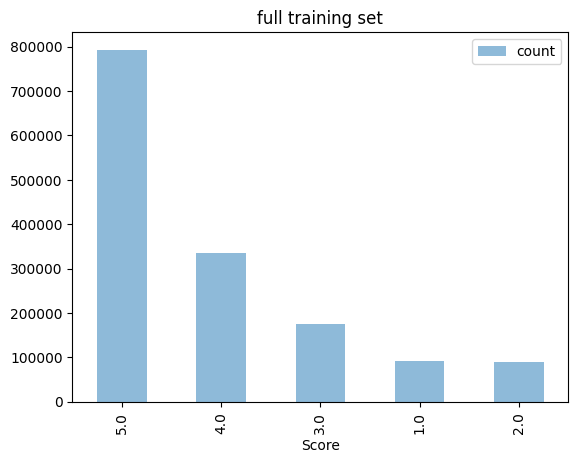


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


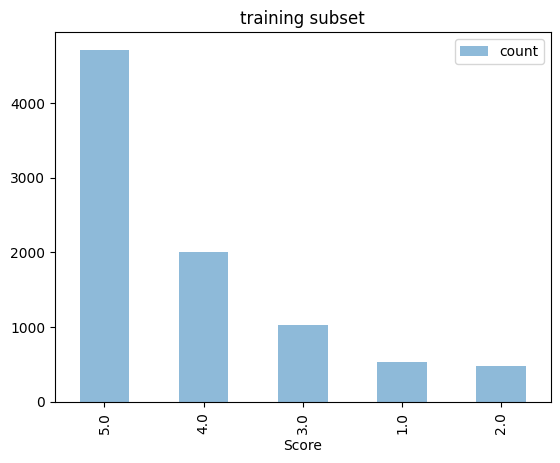

In [53]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")
# Sample 10,000 rows randomly from the training set
subset_train = trainingSet.sample(n=10000, random_state=42)

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())
print(subset_train.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title('full training set')
plt.show()
subset_train['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title('training subset')

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

Visualizing Data

In [136]:
def clean_data(df):
#drop NaN values from score column
    df = df.dropna(subset=['Score']) 
    #drop irrelevant columns
    # df = df.drop(columns=['UserId'])

    #maybe drop productid and userid after extracting some features 

    #handle helpfulness denominator of 0 
    df['Helpfulness'] = np.where(df['HelpfulnessDenominator'] == 0, 0, 
                                        df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'])
    df['Helpfulness'] = df['Helpfulness'].fillna(0) #replace 0 with na 

    #convert unix to datetime
    df['Time'] = pd.to_datetime(df['Time'], unit='s')

    #extract time features 
    df['Year'] = df['Time'].dt.year
    df['Month'] = df['Time'].dt.month
    df['DayOfWeek'] = df['Time'].dt.dayofweek
    # Convert 'Time' column from string to datetime
    df.drop(columns=['Time'], inplace=True)

    # Fill missing values in 'Summary' and 'Text' columns
    df['Summary'].fillna('No summary', inplace=True)
    df['Text'].fillna('No text', inplace=True)

    # Apply text cleaning
    df['CleanedText'] = df['Text'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')
    df['CleanedSummary'] = df['Summary'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')

    # Check for null values
    print("Missing values after processing:")
    print(df.isnull().sum())

#clean text 
def clean_text(text):
    # Remove punctuation, convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

clean_data(subset_train)



/var/folders/mw/d6jh5r755yj5xb4v20prr1g00000gn/T/ipykernel_50031/1958690218.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Helpfulness'] = np.where(df['HelpfulnessDenominator'] == 0, 0,
/var/folders/mw/d6jh5r755yj5xb4v20prr1g00000gn/T/ipykernel_50031/1958690218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Helpfulness'] = df['Helpfulness'].fillna(0) #replace 0 with na
/var/folders/mw/d6jh5r755yj5xb4v20prr1g00000gn/T/ipykernel_50031/1958690218.py:15: SettingWithCopyWarning: 
A value is t

Missing values after processing:
Id                        0
ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Summary                   0
Text                      0
Score                     0
TextLength                0
SummaryLength             0
Helpfulness               0
ExclamationMarks          0
QuestionMarks             0
PositiveWords             0
NegativeWords             0
SentimentScore            0
HasUppercaseWord          0
SentimentPolarity         0
Year                      0
Month                     0
DayOfWeek                 0
CleanedText               0
CleanedSummary            0
dtype: int64


/var/folders/mw/d6jh5r755yj5xb4v20prr1g00000gn/T/ipykernel_50031/1958690218.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanedText'] = df['Text'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')
/var/folders/mw/d6jh5r755yj5xb4v20prr1g00000gn/T/ipykernel_50031/1958690218.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanedSummary'] = df['Summary'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')


# Adding Features

In [151]:
from textblob import TextBlob
import os 



def add_features_to(df):
    # This is where you can do all your feature extraction
    df['TextLength'] = df['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df['SummaryLength'] = df['Summary'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    
    #number exclamation marks to indicate enthusiasm / emotions
    df['ExclamationMarks'] = df['Text'].apply(lambda x: x.count('!') if isinstance(x, str) else 0)
    #number of question marks = confusion
    df['QuestionMarks'] = df['Text'].apply(lambda x: x.count('?') if isinstance(x, str) else 0)

    # Sentiment polarity using simple heuristics (positive or negative words)
    positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'fantastic', 'awesome']
    negative_words = ['bad', 'terrible', 'awful', 'poor', 'worst', 'hate', 'boring']

    df['PositiveWords'] = df['Text'].apply(lambda x: sum(1 for word in x.split() if word.lower() in positive_words) if isinstance(x, str) else 0)
    df['NegativeWords'] = df['Text'].apply(lambda x: sum(1 for word in x.split() if word.lower() in negative_words) if isinstance(x, str) else 0)

    # Review sentiment score: positive - negative word count
    df['SentimentScore'] = df['PositiveWords'] - df['NegativeWords']
    df['HasUppercaseWord'] = df['Text'].apply(lambda x: any(word.isupper() for word in x.split()) if isinstance(x, str) else 0)

    df['SentimentPolarity'] = df['Text'].apply(get_sentiment)
    df['VocabularyRichness'] = df['Text'].apply(vocabulary_richness)
    df['ReviewLength'] = df['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


    return df


# Define a function to calculate sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):  # Check if text is a valid string
        return TextBlob(text).sentiment.polarity
    return 0  # Return 0 for missing or invalid text entries

def vocabulary_richness(text):
    if isinstance(text, str):
        words = text.split()
        unique_words = set(words)
        return len(unique_words) / len(words) if len(words) > 0 else 0
    return 0


# Load the feature extracted files if they've already been generated
if os.path.exists('./data/X_train.pkl') and os.path.exists('./data/X_submission.pkl'):
    with open('./data/X_train.pkl', 'rb') as f:
        X_train = pickle.load(f)
    with open('./data/X_submission.pkl', 'rb') as f:
        X_submission = pickle.load(f)
else:
    train = add_features_to(subset_train)
    X_submission = pd.merge(subset_train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})
    X_train = train[train['Score'].notnull()]

    # Save with pickle
    with open('./data/X_train.pkl', 'wb') as f:
        pickle.dump(X_train, f)
    with open('./data/X_submission.pkl', 'wb') as f:
        pickle.dump(X_submission, f)

# Sample + Split into training and testing set

In [154]:
# Split training set into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

KeyError: "['Score'] not found in axis"

In [155]:
print(X_train.head())

              Id   ProductId          UserId  HelpfulnessNumerator  \
194235   1469849  B005LAIHCW  A1X28ARLHYQQXU                     0   
431280   1330111  B00382S9MS  A22GI2VTY0RRJO                     1   
14846    1578052  B008XB2UCE  A1HHU3I9M83YBV                     3   
556988    131129  0792164903  A2B73CL3QSYWLB                     0   
1023198   121923  0790776960   A82LIVYSX6WZ9                     1   

         HelpfulnessDenominator        Time  \
194235                        0  1381276800   
431280                        1  1403568000   
14846                         3  1392595200   
556988                        3  1319846400   
1023198                       5  1065657600   

                                              Summary  \
194235                            Scary with a twist!   
431280                                  Action Impact   
14846                         Best of Naked City DVDs   
556988   Headless Horseman Undone By Brainless Script   
1023198    

# Feature Selection

In [169]:
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

# Define feature columns
features = [
    'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Helpfulness', 
    'ExclamationMarks', 'QuestionMarks', 'PositiveWords', 'NegativeWords', 
    'SentimentScore', 'HasUppercaseWord', 'SentimentPolarity', 'VocabularyRichness', 'ReviewLength'
]

# Select features from original dataset and fill any missing values
X_train_select = X_train[features].fillna(0)
X_test_select = X_test[features].fillna(0)
X_submission_select = X_submission[features].fillna(0)

# Convert boolean column to integer in a copy to avoid SettingWithCopyWarning
for df in [X_train_select, X_test_select, X_submission_select]:
    df = df.copy()
    df['HasUppercaseWord'] = df['HasUppercaseWord'].astype(int)

# Scale the data before applying SMOTEENN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_select)
X_test_scaled = scaler.transform(X_test_select)

# Apply SMOTEENN on the scaled data
X_resampled, Y_resampled = SMOTEENN(random_state=42).fit_resample(X_train_scaled, Y_train)

# Apply PCA to the scaled, resampled data
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Output data types and shapes
print("Data types after processing:", X_train_select.dtypes)
print("Shape of PCA transformed training data:", X_train_pca.shape)
print("Shape of PCA transformed test data:", X_test_pca.shape)



Data types after processing: HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Time                        int64
Helpfulness               float64
ExclamationMarks            int64
QuestionMarks               int64
PositiveWords               int64
NegativeWords               int64
SentimentScore              int64
HasUppercaseWord            int64
SentimentPolarity         float64
VocabularyRichness        float64
ReviewLength                int64
dtype: object
Shape of PCA transformed training data: (11612, 10)
Shape of PCA transformed test data: (2187, 10)


# Model Creation

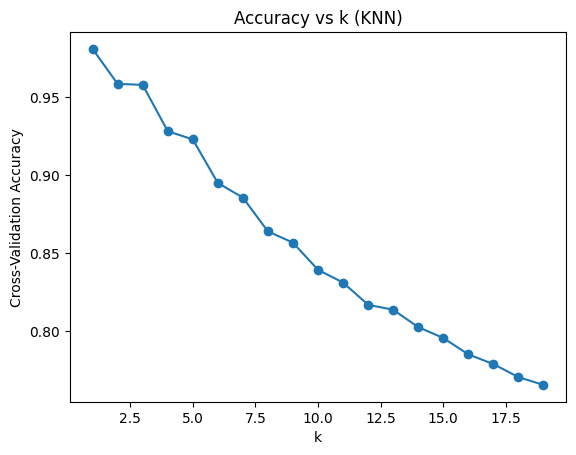

Best k for KNN: 1
Classification Report for KNN Model:
              precision    recall  f1-score   support

         1.0       0.26      0.40      0.31       142
         2.0       0.12      0.30      0.17       126
         3.0       0.15      0.30      0.20       274
         4.0       0.26      0.30      0.28       497
         5.0       0.70      0.33      0.45      1148

    accuracy                           0.32      2187
   macro avg       0.30      0.33      0.28      2187
weighted avg       0.47      0.32      0.35      2187


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

         1.0       0.38      0.55      0.45       142
         2.0       0.13      0.26      0.18       126
         3.0       0.18      0.40      0.25       274
         4.0       0.31      0.33      0.32       497
         5.0       0.76      0.40      0.53      1148

    accuracy                           0.39      2187
   macro avg       0.35     

In [170]:
#cross validation to determine best k value 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Range of k values to try
k_values = list(range(1, 20))  # Try k values from 1 to 20
cv_scores = []  # List to hold cross-validation scores

# Perform cross-validation for each value of k
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation (you can adjust cv=5 to your preference)
    scores = cross_val_score(model, X_train_select, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())  # Append the mean of the cross-validation scores

# Determine the best k based on cross-validation accuracy
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k}")

# Plotting the accuracy vs k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs k (KNN)')
plt.show()

# Learn the model
# model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_select, Y_train)
# Predict the score using the model
model = KNeighborsClassifier(n_neighbors=best_k).fit(X_resampled, Y_resampled)
Y_test_predictions = model.predict(X_resampled)

#feature importance analysis
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_resampled, Y_resampled)
Y_test_predictions_rf = random_forest.predict(X_test_select)

print("Classification Report for Random Forest Model:")
print(classification_report(Y_test, Y_test_predictions_rf))

# Feature importance analysis with Random Forest
feature_importances = random_forest.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(importance_df)

print(classification_report(Y_test, Y_test_predictions))



# Model Evaluation

Accuracy on testing set = 0.38774577046181985


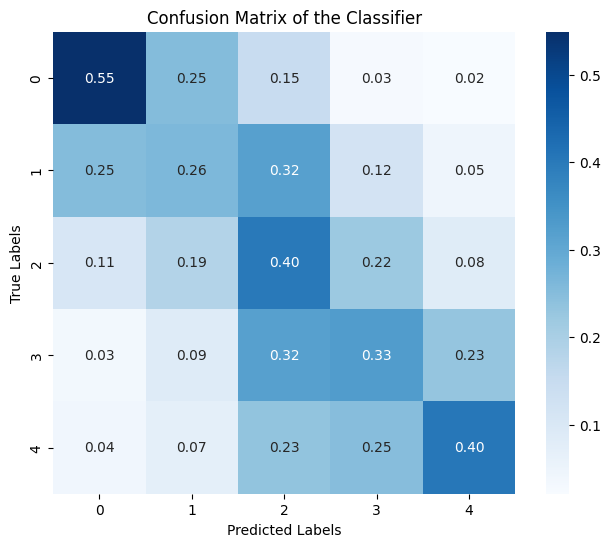

In [172]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [111]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
print("submission.csv shape is ", submission.shape)

submission.to_csv("./data/submission.csv", index=False)

submission.csv shape is  (1253, 2)
